In [23]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [24]:

# Step 2: Load dataset
df = pd.read_csv("/content/netflix_titles.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
# Handle missing values
df['rating'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
print("\nMissing values after cleaning:\n", df.isnull().sum())
df = df.dropna(subset=['cast'])
df = df.dropna(subset=['date_added'])
print("\nMissing values after cleaning cast and date_added:\n", df.isnull().sum())




Missing values after cleaning:
 show_id           0
type              0
title             0
director          0
cast            825
country           0
date_added       10
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64

Missing values after cleaning cast and date_added:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


/tmp/ipython-input-2323332555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2323332555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
#show data again
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


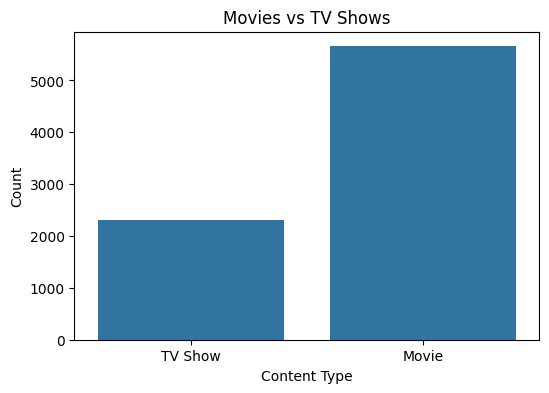

In [27]:
# Analyze Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df)
plt.title("Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

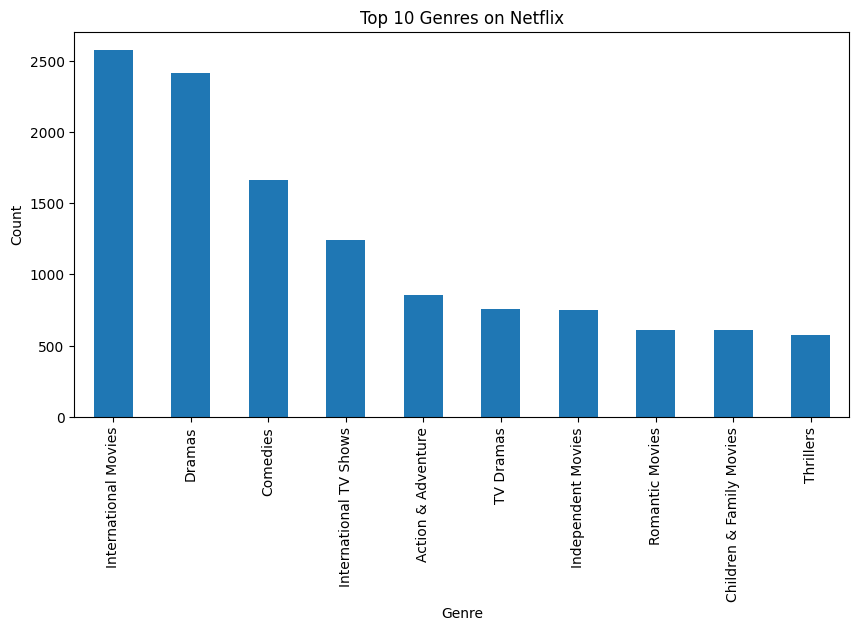

In [28]:
# Top Genres
plt.figure(figsize=(10,5))
df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

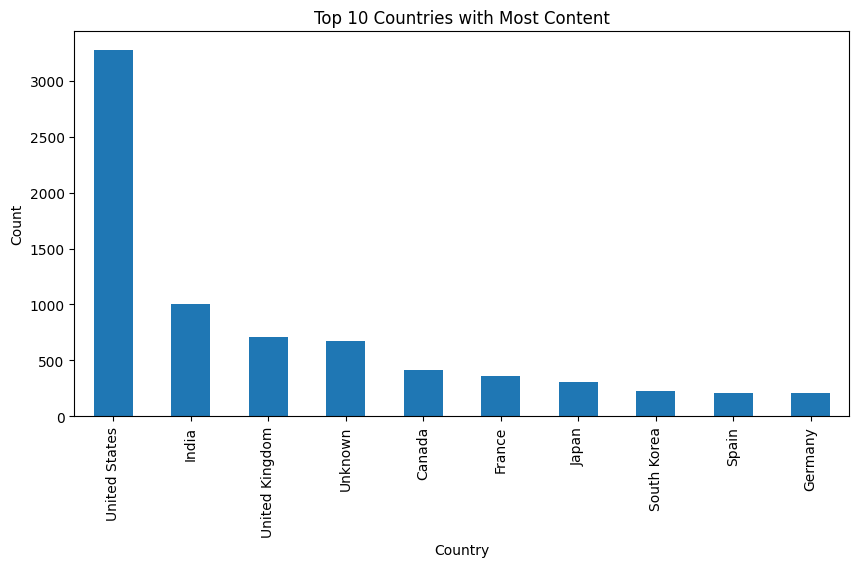

In [29]:
# Top Countries
plt.figure(figsize=(10,5))
df['country'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

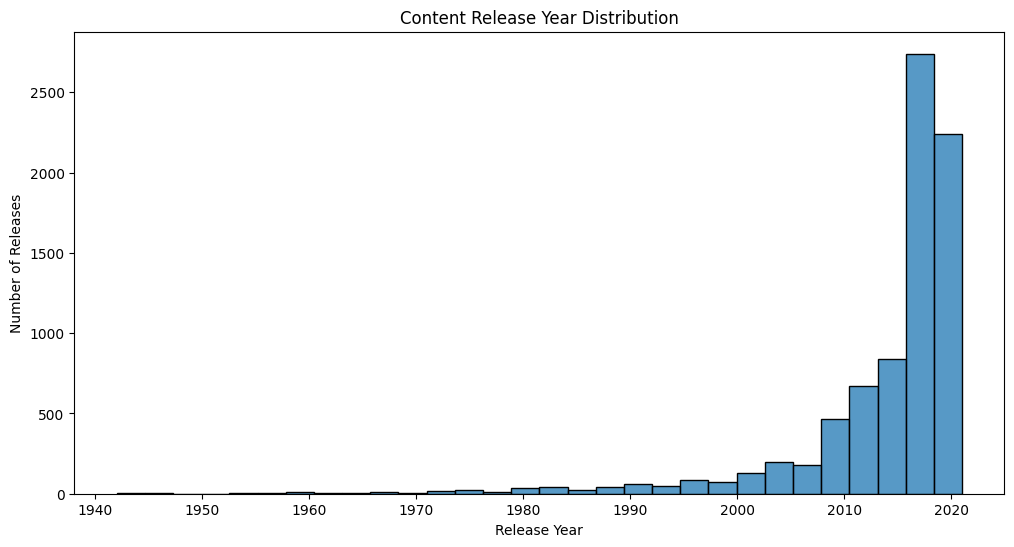

In [30]:

# Release Year Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.show()


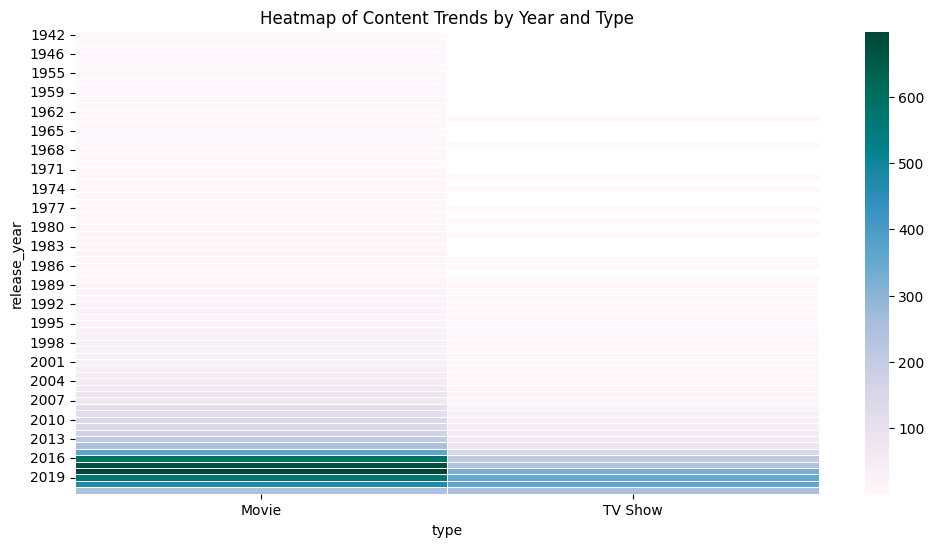

In [31]:
# Heatmap of release year vs content type
plt.figure(figsize=(12,6))
content_trend = df.groupby(['release_year','type']).size().reset_index(name='counts')
pivot_trend = content_trend.pivot(index='release_year', columns='type', values='counts')
sns.heatmap(pivot_trend, cmap="PuBuGn", linewidths=.5)
plt.title("Heatmap of Content Trends by Year and Type")
plt.show()

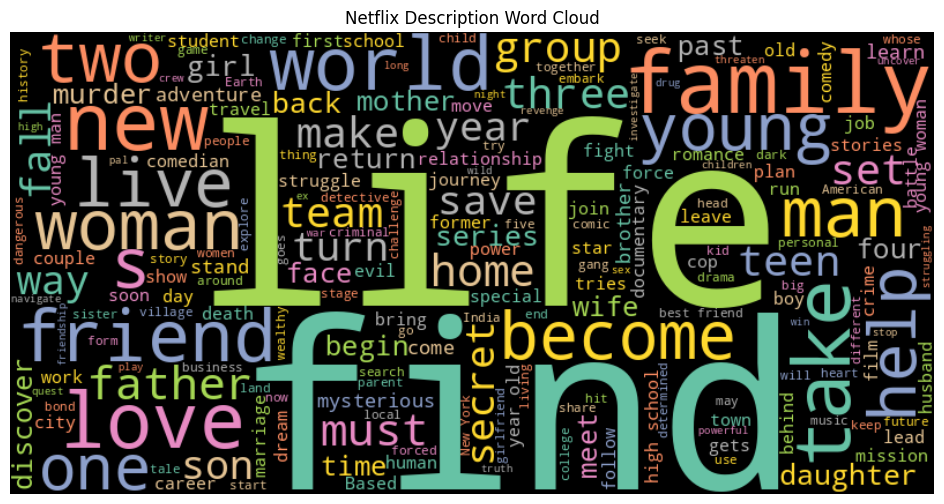

In [32]:
# Word Cloud for Descriptions
text = " ".join(desc for desc in df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Description Word Cloud")
plt.show()

In [33]:
# Save cleaned dataset for Power BI
df.to_csv("netflix_clean.csv", index=False)

print("Cleaned dataset saved as 'netflix_clean.csv'")


Cleaned dataset saved as 'netflix_clean.csv'
